# **Assignment 1 : ML Data Cleaning and Feature Selection**

# **ABSTRACT:**

In this notebook i have used the dataset that describes world population(yearly %change, median age, fertility rate, global rank) of all the continenst and countries from 1955-2020. Each time period records the change 5 years apart. The main aim of the notebook is to check the quality of data and determine which features are important. The notebook has used statistical methods like p-value,t-statistics and visualization modules like Q-Q plot, scatter plot, box plot of phython's matplotlib and seaborn library to answer below questions about the dataset.

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.



**DATASET: World's Population Dataset (1955-2020)**

The dataset consist of:


*  13 independent variables i.e Continent, Country, Year, Population, Yearly %change, Yearly change, Migrants(net), FertilityRate, UrbanPop%, Urban Population, Country%ofWorldPop,GlobalRank
* Median Age- Dependent Variable
* There are total of 4230 observations.(These records are 5 years apart)


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
import seaborn as sns

In [ ]:
#Reading the dataset
url = r'https://github.com/jeelkan/DSE/blob/main/population.csv?raw=true'


In [ ]:
wp_df = pd.read_csv(url,index_col=0)


In [ ]:
#viewing data in file
wp_df.head()

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
0,Asia,Afghanistan,1955,8270991,1.30,103775,-4000,19.2,7.45,7.1,587818,0.30,48
1,Asia,Afghanistan,1960,8996973,1.70,145196,-4000,18.8,7.45,8.4,755797,0.30,48
2,Asia,Afghanistan,1965,9956320,2.05,191869,-4000,18.4,7.45,9.9,984350,0.30,48
3,Asia,Afghanistan,1970,11173642,2.33,243464,-4000,17.9,7.45,11.6,1295433,0.30,48
4,Asia,Afghanistan,1975,12689160,2.58,303104,-4000,17.3,7.45,13.5,1717422,0.31,48


In [ ]:
#checking if any data is missing
wp_df.isnull().sum()

Continent             0
Country               0
Year                  0
Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

No data is missing from the dataset which means that it is not required to impute or remove null values from the dataset.

In [ ]:
#checking count of the dataset
wp_df.count()

Continent             4230
Country               4230
Year                  4230
Population            4230
Yearly%Change         4230
YearlyChange          4230
Migrants(net)         4230
MedianAge             4230
FertilityRate         4230
UrbanPop%             4230
UrbanPopulation       4230
Country%OfWorldPop    4230
GlobalRank            4230
dtype: int64

**Q-Q Plot:**

<Figure size 576x360 with 0 Axes>

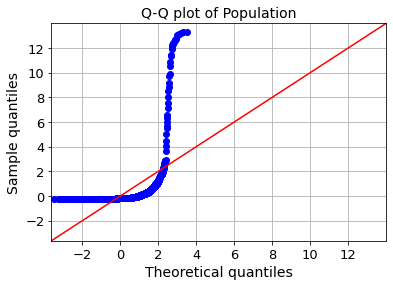

<Figure size 576x360 with 0 Axes>

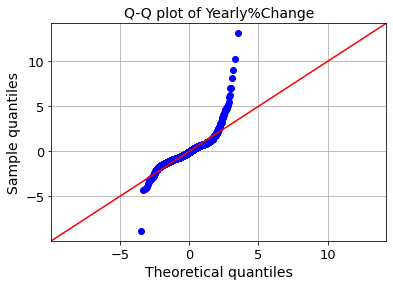

<Figure size 576x360 with 0 Axes>

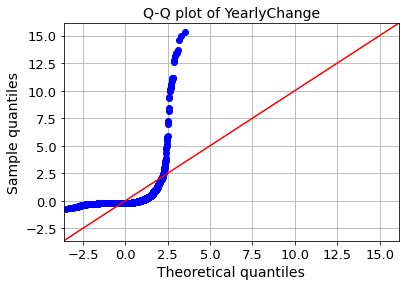

<Figure size 576x360 with 0 Axes>

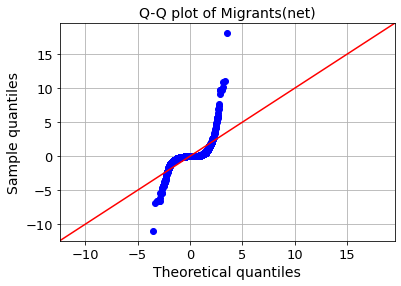

<Figure size 576x360 with 0 Axes>

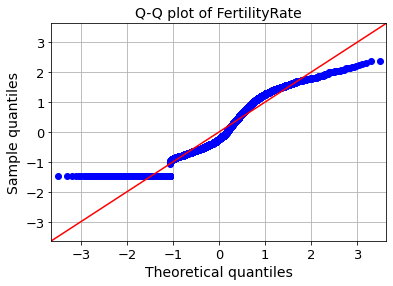

<Figure size 576x360 with 0 Axes>

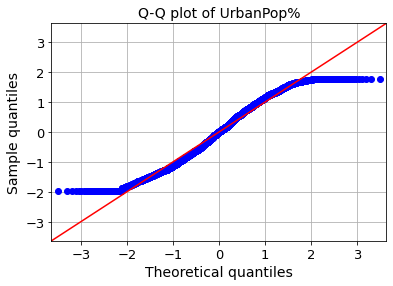

<Figure size 576x360 with 0 Axes>

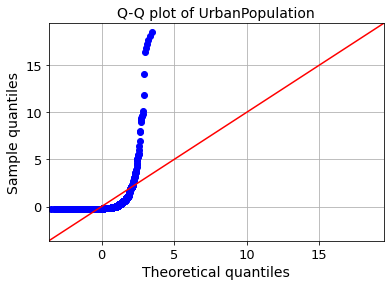

<Figure size 576x360 with 0 Axes>

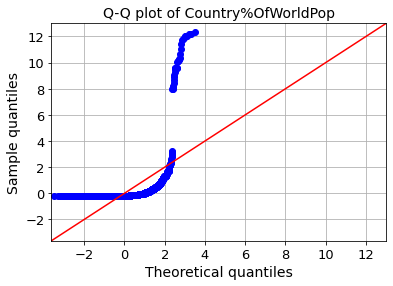

<Figure size 576x360 with 0 Axes>

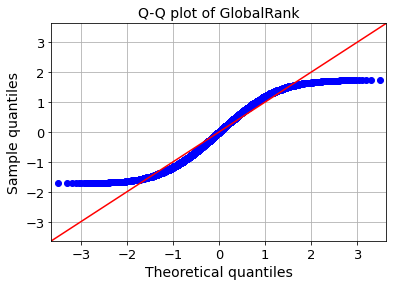

In [ ]:
#distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
#wp_norm = wp_df[['Population', 'Yearly%Change', 'Yearly Change', 'Median Age', 'FertilityRate', 'UrbanPopulation', 'UrbanPop', 'GlobalRank']]
data_norm=wp_df[['Population','Yearly%Change','YearlyChange','Migrants(net)','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='true')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=14)
  plt.ylabel("Sample quantiles",fontsize=14)
  plt.title("Q-Q plot of {}".format(c),fontsize=14)
  plt.grid(True)
  plt.show





1.   Looking at Q-Q plot above, Population,Global Rank,Migransts(net), UrbanPop%,yearly Change are likely following normal distribution.
2.   There are few outliers in few variables like Yearly %change, FertilityRate, Country%OfWorldPop



In [ ]:
wp_df

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
0,Asia,Afghanistan,1955,8270991,1.30,103775,-4000,19.2,7.45,7.1,587818,0.30,48
1,Asia,Afghanistan,1960,8996973,1.70,145196,-4000,18.8,7.45,8.4,755797,0.30,48
2,Asia,Afghanistan,1965,9956320,2.05,191869,-4000,18.4,7.45,9.9,984350,0.30,48
3,Asia,Afghanistan,1970,11173642,2.33,243464,-4000,17.9,7.45,11.6,1295433,0.30,48
4,Asia,Afghanistan,1975,12689160,2.58,303104,-4000,17.3,7.45,13.5,1717422,0.31,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,Africa,Zimbabwe,2016,14030331,1.56,215702,-116858,18.5,3.99,37.2,5215894,0.19,74
4226,Africa,Zimbabwe,2017,14236595,1.47,206264,-116858,18.5,3.99,37.4,5328766,0.19,74
4227,Africa,Zimbabwe,2018,14438802,1.42,202207,-116858,18.5,3.99,37.7,5447513,0.19,74
4228,Africa,Zimbabwe,2019,14645468,1.43,206666,-116858,18.5,3.99,38.0,5571525,0.19,74


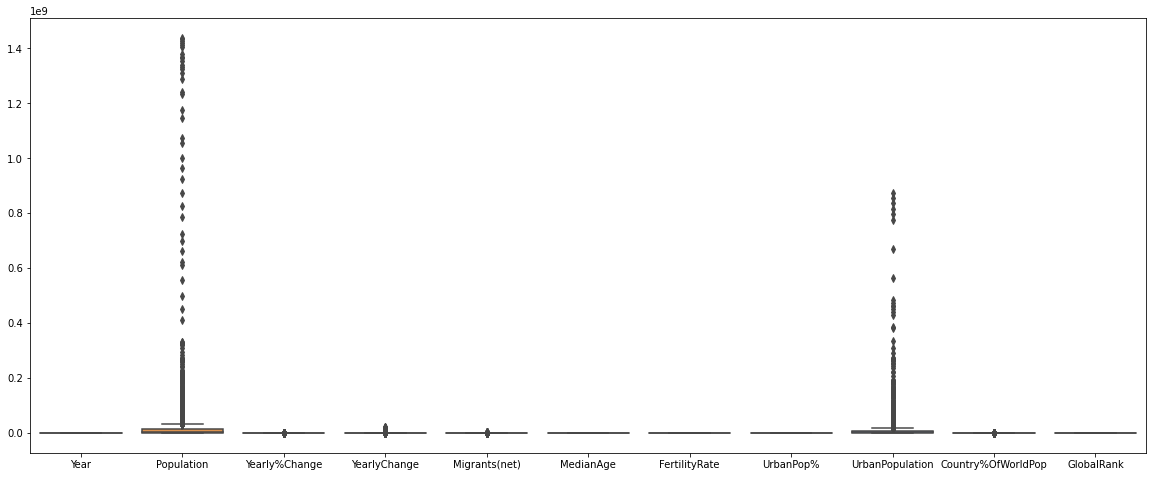

In [ ]:
#Checking range of predictor variables and dependent variables
plt.figure(figsize=(20,8))
sns.boxplot(data=wp_df)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for better understanding and visualization. I will also help later to get normalized coefficients when building the model.
So need to normalize each column so that they are in same range.

<ipython-input-74-eb0f14801bbf>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<function matplotlib.pyplot.show(*args, **kw)>

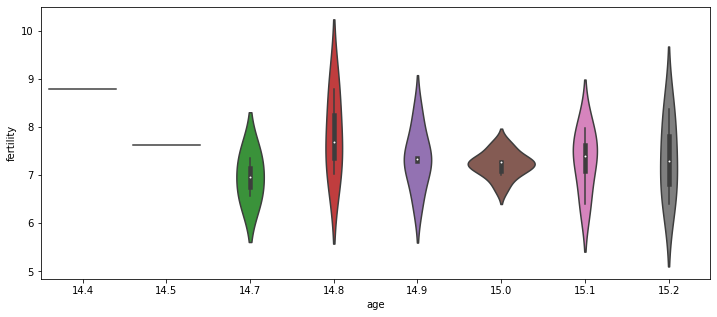

In [ ]:
#vilone plot of the variables
dict = {'year': wp_df['Year'], 'country':wp_df['Country'], 'age':wp_df['MedianAge'], 'fertility': wp_df['FertilityRate']}
sub_df = pd.DataFrame(dict)
data = sub_df.sort_values(by=['age'], ascending=True)[sub_df['age'] != 0.0][:30]
plt.figure(figsize=(12,5))
sns.violinplot(data=data, x="age", y="fertility")
plt.show


In [ ]:
wp_df.shape

In [ ]:
#Checking population change 
import plotly.express as px

In [ ]:
fig=px.line(wp_df,x="Year" , y="YearlyChange" , color="Country" , labels={"YearlyChange" : "Population Change", }, title="Change of Country population per year")
fig.show()

The above diagram shows the change of country population per year and it shows that country of American Samoa and Angulla has drastic change in population growth.

In [ ]:
#checking correlation between all the features in the data
wp_df.corr()

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank
Year,1.000000,0.069433,-0.241882,0.028920,-0.000051,0.246095,-0.395308,0.320801,0.111560,-0.000007,0.000085
Population,0.069433,1.000000,-0.033177,0.870742,-0.142915,0.110672,-0.014700,-0.037494,0.920392,0.953910,-0.326906
Yearly%Change,-0.241882,-0.033177,1.000000,0.058471,0.098813,-0.236885,0.497521,-0.166117,-0.070963,-0.019832,-0.052321
YearlyChange,0.028920,0.870742,0.058471,1.000000,-0.119322,0.028437,0.083537,-0.109838,0.660398,0.918017,-0.343914
Migrants(net),-0.000051,-0.142915,0.098813,-0.119322,1.000000,0.113609,-0.069266,0.148223,-0.025389,-0.106216,-0.019669
MedianAge,0.246095,0.110672,-0.236885,0.028437,0.113609,1.000000,0.012332,0.265609,0.173837,0.094827,-0.472642
FertilityRate,-0.395308,-0.014700,0.497521,0.083537,-0.069266,0.012332,1.000000,-0.506359,-0.067777,0.016339,-0.358958
UrbanPop%,0.320801,-0.037494,-0.166117,-0.109838,0.148223,0.265609,-0.506359,1.000000,0.057543,-0.061107,0.083890
UrbanPopulation,0.111560,0.920392,-0.070963,0.660398,-0.025389,0.173837,-0.067777,0.057543,1.000000,0.816415,-0.351308
Country%OfWorldPop,-0.000007,0.953910,-0.019832,0.918017,-0.106216,0.094827,0.016339,-0.061107,0.816415,1.000000,-0.339929


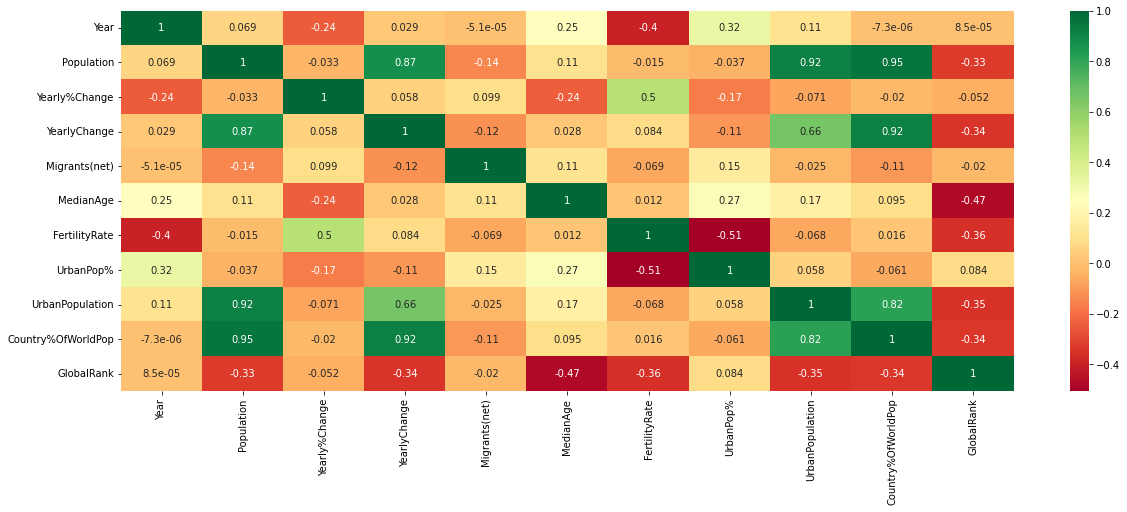

In [ ]:
#heat map of correlation
plt.figure(figsize=(20,7))
sns.heatmap(wp_df.corr(), annot=True, cmap='RdYlGn')

We can see there are coorelation between the variables. The co-relation between population and country%ofworldpop being the highest.

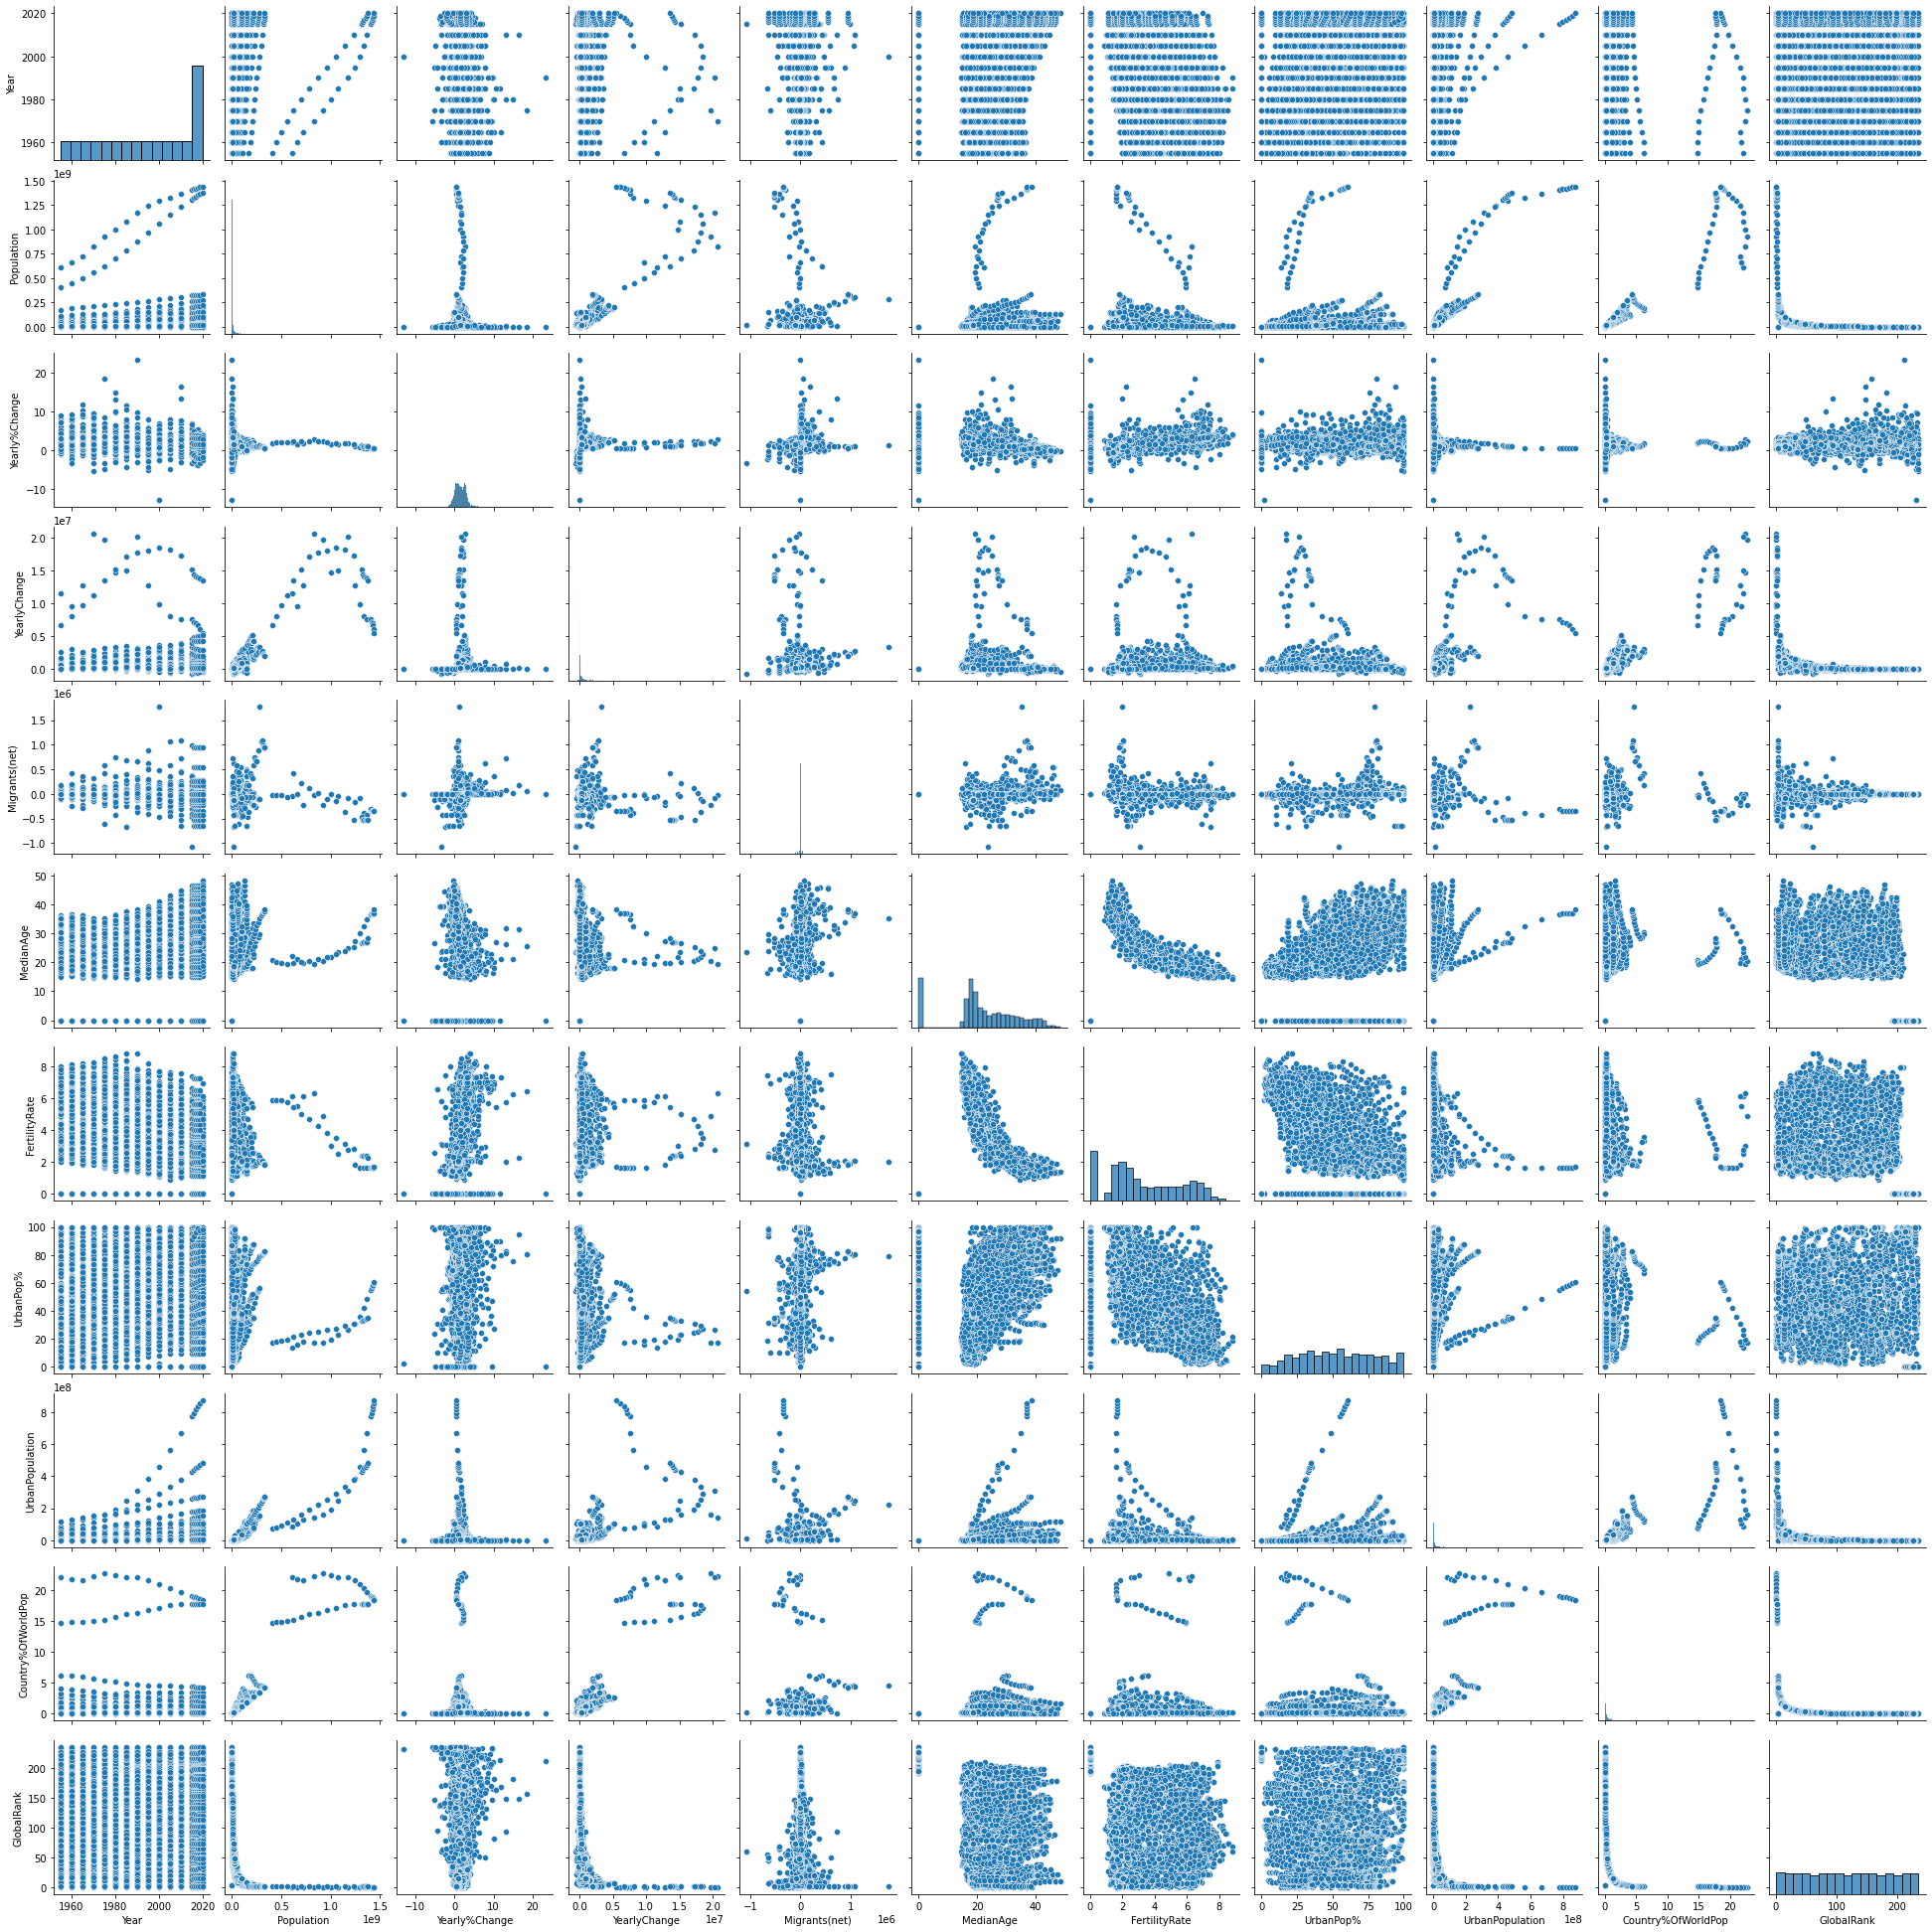

In [ ]:
#pairplot to check collinearity
sns.pairplot(wp_df)

From the pairplot above we can see that all the variables are independent of wach other without correlation. 

# **Data transforming, Feature creation and Analysis**

In [ ]:
#one hot encoding to convert categorial data into numerical data
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Encode the 'category' column using the fit_transform method
encoded_data = encoder.fit_transform(wp_df[['Continent','Country']])

# Convert the encoded data to a dataframe
wp_df_new = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Continent','Country']))

# Print the encoded dataframe
print(wp_df_new)

      Continent_Africa  Continent_Asia  Continent_Europe  \
0                  0.0             1.0               0.0   
1                  0.0             1.0               0.0   
2                  0.0             1.0               0.0   
3                  0.0             1.0               0.0   
4                  0.0             1.0               0.0   
...                ...             ...               ...   
4225               1.0             0.0               0.0   
4226               1.0             0.0               0.0   
4227               1.0             0.0               0.0   
4228               1.0             0.0               0.0   
4229               1.0             0.0               0.0   

      Continent_Latin America and the Caribbean  Continent_North America  \
0                                           0.0                      0.0   
1                                           0.0                      0.0   
2                                           0.0    

In [ ]:
#dropping the categorial columns
wp_df = wp_df.drop(columns=['Continent','Country'])

In [ ]:
#concatinating the newly created columns
wp_df = pd.concat([wp_df,wp_df_new], axis=1)

In [ ]:
# Normalizing the data in the each column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

for column_name in ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']:
    # Create x to store scaled values as floats
    x = wp_df[[column_name]].values.astype(float)

    # Preparing for normalizing
    min_max_scaler = preprocessing.MinMaxScaler()

    # Transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    wp_df[[column_name]] = pd.DataFrame(x_scaled)

In [ ]:
#after normalizing the data
wp_df

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis & Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1955,0.005746,0.392768,0.036385,0.376711,0.396694,0.846591,0.071,0.000672,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1960,0.006250,0.403809,0.038325,0.376711,0.388430,0.846591,0.084,0.000864,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965,0.006917,0.413470,0.040511,0.376711,0.380165,0.846591,0.099,0.001125,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0.007763,0.421198,0.042928,0.376711,0.369835,0.846591,0.116,0.001480,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1975,0.008816,0.428098,0.045721,0.376711,0.357438,0.846591,0.135,0.001963,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,2016,0.009747,0.399945,0.041627,0.337104,0.382231,0.453409,0.372,0.005961,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4226,2017,0.009891,0.397461,0.041185,0.337104,0.382231,0.453409,0.374,0.006089,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4227,2018,0.010031,0.396081,0.040995,0.337104,0.382231,0.453409,0.377,0.006225,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4228,2019,0.010175,0.396357,0.041204,0.337104,0.382231,0.453409,0.380,0.006367,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


 **Remove Data Randomly**

In [ ]:
wp_df.isnull().sum()

Year                       0
Population                 0
Yearly%Change              0
YearlyChange               0
Migrants(net)              0
                          ..
Country_Wallis & Futuna    0
Country_Western Sahara     0
Country_Yemen              0
Country_Zambia             0
Country_Zimbabwe           0
Length: 253, dtype: int64

In [ ]:
# remove 1% data randomly 
df_part_1per = wp_df[['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']];
col_list = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']
for col in col_list:
    df_part_1per.loc[df_part_1per.sample(frac=0.01).index, col] = pd.np.nan

# remove 5% data randomly
df_part_5per = wp_df[['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']];
for col in col_list:
    df_part_5per.loc[df_part_5per.sample(frac=0.05).index, col] = pd.np.nan

# remove 10% data randomly
df_part_10per = wp_df[['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank']];
for col in col_list:
    df_part_10per.loc[df_part_10per.sample(frac=0.10).index, col] = pd.np.nan



<ipython-input-86-4f2eca1ec281>:5: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-4f2eca1ec281>:10: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-86-4f2eca1ec281>:15: FutureWarning:

The 

In [ ]:
#checking percent of misssing data
df_part_1per.isnull().sum()

Population            42
Yearly%Change         42
YearlyChange          42
Migrants(net)         42
MedianAge             42
FertilityRate         42
UrbanPop%             42
UrbanPopulation       42
Country%OfWorldPop    42
GlobalRank            42
dtype: int64

In [ ]:
#checking percent of misssing data
df_part_5per.isnull().sum()

Population            212
Yearly%Change         212
YearlyChange          212
Migrants(net)         212
MedianAge             212
FertilityRate         212
UrbanPop%             212
UrbanPopulation       212
Country%OfWorldPop    212
GlobalRank            212
dtype: int64

In [ ]:
#checking percent of misssing data
df_part_10per.isnull().sum()

Population            423
Yearly%Change         423
YearlyChange          423
Migrants(net)         423
MedianAge             423
FertilityRate         423
UrbanPop%             423
UrbanPopulation       423
Country%OfWorldPop    423
GlobalRank            423
dtype: int64

**KNN Imputation for Missing Data**

In [ ]:
#KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
#1% missing value
imp_knn_df_1per = imputer.fit_transform(df_part_1per)
imp_knn_df_1per = pd.DataFrame(imp_knn_df_1per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_knn_df_1per.isnull().sum()

#5% missing value
imp_knn_df_5per = imputer.fit_transform(df_part_5per)
imp_knn_df_5per = pd.DataFrame(imp_knn_df_5per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_knn_df_5per.isnull().sum()

#10% missing value
imp_knn_df_10per = imputer.fit_transform(df_part_10per)
imp_knn_df_10per = pd.DataFrame(imp_knn_df_10per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_knn_df_10per.isnull().sum()

Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

KNN imputer compeletely cover the missing value.

**MICE Imputation for Missing Data**

In [ ]:
#MICE Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
Mice_imputer = IterativeImputer(max_iter=10, random_state=0)
#1% missing value
imp_Mice_df_1per = Mice_imputer.fit_transform(df_part_1per)
print(imp_Mice_df_1per)

#5% missing value
imp_Mice_df_5per = Mice_imputer.fit_transform(df_part_5per)
print(imp_Mice_df_5per)

#10% missing value
imp_Mice_df_10per = Mice_imputer.fit_transform(df_part_10per)
print(imp_Mice_df_10per)


[[0.005746   0.39276842 0.03638486 ... 0.00067173 0.01321586 0.2008547 ]
 [0.00625039 0.403809   0.038325   ... 0.00086369 0.01321586 0.2008547 ]
 [0.00691692 0.4134695  0.04051114 ... 0.00112487 0.01321586 0.2008547 ]
 ...
 [0.01003121 0.3960806  0.04099537 ... 0.00622519 0.00837004 0.31196581]
 [0.0101748  0.39635661 0.04120423 ... 0.0063669  0.00837004 0.31196581]
 [0.01032588 0.39773668 0.04170962 ... 0.00651425 0.00837004 0.31196581]]


/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



[[0.005746   0.39276842 0.03638486 ... 0.00067173 0.01321586 0.2008547 ]
 [0.00625039 0.403809   0.038325   ... 0.00086369 0.01321586 0.2008547 ]
 [0.00691692 0.4134695  0.04051114 ... 0.00112487 0.01321586 0.2008547 ]
 ...
 [0.01003121 0.3960806  0.04099537 ... 0.00622519 0.01388035 0.31196581]
 [0.0101748  0.39635661 0.04120423 ... 0.0063669  0.00837004 0.47893588]
 [0.01032588 0.39773668 0.04170962 ... 0.00614362 0.00837004 0.31196581]]
[[-0.00130184  0.39276842  0.03638486 ...  0.00067173  0.00253806
   0.2008547 ]
 [ 0.00625039  0.403809    0.051951   ...  0.00086369  0.01321586
   0.2008547 ]
 [ 0.00691692  0.4134695   0.04051114 ...  0.00112487  0.01321586
   0.2008547 ]
 ...
 [ 0.01003121  0.4046265   0.04099537 ...  0.00622519  0.00837004
   0.31196581]
 [ 0.0101748   0.39635661  0.04120423 ...  0.0063669   0.00837004
   0.31196581]
 [ 0.01032588  0.39773668  0.04170962 ...  0.00651425  0.00837004
   0.31196581]]


/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
imp_Mice_df_1per = pd.DataFrame(imp_Mice_df_1per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])

imp_Mice_df_5per = pd.DataFrame(imp_Mice_df_1per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])

imp_Mice_df_10per = pd.DataFrame(imp_Mice_df_1per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])

In [ ]:
imp_Mice_df_1per.isnull().sum()

Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

In [ ]:
imp_Mice_df_5per.isnull().sum()

Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

In [ ]:
imp_Mice_df_10per.isnull().sum()

Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

MICE imputer compeletely cover the missing value.

**Mean Imputation for Missing data**

In [ ]:
#Mean Computation
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')

#1% missing value
imp_Mean_df_1per = imp_mean.fit_transform(df_part_1per)
imp_Mean_df_1per = pd.DataFrame(imp_Mean_df_1per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_Mean_df_1per.isnull().sum()

#5% missing value
imp_Mean_df_5per = imp_mean.fit_transform(df_part_5per)
imp_Mean_df_5per = pd.DataFrame(imp_Mean_df_5per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_Mean_df_5per.isnull().sum()

#10% missing value
imp_Mean_df_10per = imp_mean.fit_transform(df_part_10per)
imp_Mean_df_10per = pd.DataFrame(imp_Mean_df_10per,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
imp_Mean_df_10per.isnull().sum()


Population            0
Yearly%Change         0
YearlyChange          0
Migrants(net)         0
MedianAge             0
FertilityRate         0
UrbanPop%             0
UrbanPopulation       0
Country%OfWorldPop    0
GlobalRank            0
dtype: int64

Mean imputer compeletely cover the missing value.

**Making Predictions**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



**Making Prediction through KNN Menthod**

In [ ]:
#Computation KNN:
#1%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_knn_df_1per)
mae=mean_absolute_error(wp_df_data,imp_knn_df_1per)
r2_square=r2_score(wp_df_data,imp_knn_df_1per)

print("Mean Squared Error using KNN method for 1%value: " ,mse )
print("Mean Absolute Error using KNN method for 1%value: " ,mae )
print("R squared using KNN method for 1%value: " ,r2_square )
print()

#5%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_knn_df_5per)
mae=mean_absolute_error(wp_df_data,imp_knn_df_5per)
r2_square=r2_score(wp_df_data,imp_knn_df_5per)

print("Mean Squared Error using KNN method for 5%value: " ,mse )
print("Mean Absolute Error using KNN method for 5%value: " ,mae )
print("R squared using KNN method for 5%value: " ,r2_square )

print()

#10%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_knn_df_10per)
mae=mean_absolute_error(wp_df_data,imp_knn_df_10per)
r2_square=r2_score(wp_df_data,imp_knn_df_10per)

print("Mean Squared Error using KNN method for 10%value: " ,mse )
print("Mean Absolute Error using KNN method for 10%value: " ,mae )
print("R squared using KNN method for 10%value: " ,r2_square )



Mean Squared Error using KNN method for 1%value:  4.174628988370299e-05
Mean Absolute Error using KNN method for 1%value:  0.0002161214627505813
R squared using KNN method for 1%value:  0.9988834803285561

Mean Squared Error using KNN method for 5%value:  0.00037568936114715094
Mean Absolute Error using KNN method for 5%value:  0.001593954543058979
R squared using KNN method for 5%value:  0.9917085351685422

Mean Squared Error using KNN method for 10%value:  0.0010808557827793161
Mean Absolute Error using KNN method for 10%value:  0.004266185598538697
R squared using KNN method for 10%value:  0.9754352766466294


**Making Prediction through MICE Method**

In [ ]:
#Computation MICE:
#1%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mice_df_1per)
mae=mean_absolute_error(wp_df_data,imp_Mice_df_1per)
r2_square=r2_score(wp_df_data,imp_Mice_df_1per)

print("Mean Squared Error using MICE method for 1%value: " ,mse )
print("Mean Absolute Error using MICE method for 1%value: " ,mae )
print("R squared using MICE method for 1%value: " ,r2_square )
print()
#5%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mice_df_5per)
mae=mean_absolute_error(wp_df_data,imp_Mice_df_5per)
r2_square=r2_score(wp_df_data,imp_Mice_df_5per)

print("Mean Squared Error using MICE method for 5%value: " ,mse )
print("Mean Absolute Error using MICE method for 5%value: " ,mae )
print("R squared using MICE method for 5%value: " ,r2_square )

print()
#10%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mice_df_10per)
mae=mean_absolute_error(wp_df_data,imp_Mice_df_10per)
r2_square=r2_score(wp_df_data,imp_Mice_df_10per)

print("Mean Squared Error using MICE method for 10%value: " ,mse )
print("Mean Absolute Error using MICE method for 10%value: " ,mae )
print("R squared using MICE method for 10%value: " ,r2_square )



Mean Squared Error using MICE method for 1%value:  0.00013701136502765888
Mean Absolute Error using MICE method for 1%value:  0.0006326557197957824
R squared using MICE method for 1%value:  0.9970986135768756

Mean Squared Error using MICE method for 5%value:  0.00013701136502765888
Mean Absolute Error using MICE method for 5%value:  0.0006326557197957824
R squared using MICE method for 5%value:  0.9970986135768756

Mean Squared Error using MICE method for 10%value:  0.00013701136502765888
Mean Absolute Error using MICE method for 10%value:  0.0006326557197957824
R squared using MICE method for 10%value:  0.9970986135768756


**Making Prediction through Mean Menthod**

In [ ]:
#Computation Mean:
#1%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mean_df_1per)
mae=mean_absolute_error(wp_df_data,imp_Mean_df_1per)
r2_square=r2_score(wp_df_data,imp_Mean_df_1per)

print("Mean Squared Error using Mean method for 1%value: " ,mse )
print("Mean Absolute Error using Mean method for 1%value: " ,mae )
print("R squared using Mean method for 1%value: " ,r2_square )
print()
#5%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mean_df_5per)
mae=mean_absolute_error(wp_df_data,imp_Mean_df_5per)
r2_square=r2_score(wp_df_data,imp_Mean_df_5per)

print("Mean Squared Error using Mean method for 5%value: " ,mse )
print("Mean Absolute Error using Mean method for 5%value: " ,mae )
print("R squared using Mean method for 5%value: " ,r2_square )

print()
#10%
wp_df_data=pd.DataFrame(wp_df,columns = ['Population','Yearly%Change','YearlyChange','Migrants(net)','MedianAge','FertilityRate','UrbanPop%','UrbanPopulation','Country%OfWorldPop','GlobalRank'])
mse=mean_squared_error(wp_df_data,imp_Mean_df_10per)
mae=mean_absolute_error(wp_df_data,imp_Mean_df_10per)
r2_square=r2_score(wp_df_data,imp_Mean_df_10per)

print("Mean Squared Error using Mean method for 10%value: " ,mse )
print("Mean Absolute Error using Mean method for 10%value: " ,mae )
print("R squared using Mean method for 10%value: " ,r2_square )



Mean Squared Error using Mean method for 1%value:  0.000328105936171188
Mean Absolute Error using Mean method for 1%value:  0.0010480094303463097
R squared using Mean method for 1%value:  0.9900942116638106

Mean Squared Error using Mean method for 5%value:  0.0015373295351142255
Mean Absolute Error using Mean method for 5%value:  0.005136347375353284
R squared using Mean method for 5%value:  0.9430316851411465

Mean Squared Error using Mean method for 10%value:  0.0030728449912279998
Mean Absolute Error using Mean method for 10%value:  0.010311598855513474
R squared using Mean method for 10%value:  0.8958657260446137


From the above three impuation methods it is shown that using MICE can better simulate the real data when there is large amount of missing data.

# **Building the Model**

**Splitting data into  training and testing set**

In [ ]:
#Splitting data into traning and testing set
wp_df

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis & Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1955,0.005746,0.392768,0.036385,0.376711,0.396694,0.846591,0.071,0.000672,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1960,0.006250,0.403809,0.038325,0.376711,0.388430,0.846591,0.084,0.000864,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965,0.006917,0.413470,0.040511,0.376711,0.380165,0.846591,0.099,0.001125,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0.007763,0.421198,0.042928,0.376711,0.369835,0.846591,0.116,0.001480,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1975,0.008816,0.428098,0.045721,0.376711,0.357438,0.846591,0.135,0.001963,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,2016,0.009747,0.399945,0.041627,0.337104,0.382231,0.453409,0.372,0.005961,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4226,2017,0.009891,0.397461,0.041185,0.337104,0.382231,0.453409,0.374,0.006089,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4227,2018,0.010031,0.396081,0.040995,0.337104,0.382231,0.453409,0.377,0.006225,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4228,2019,0.010175,0.396357,0.041204,0.337104,0.382231,0.453409,0.380,0.006367,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
wp_df_x = wp_df

In [ ]:
wp_df_x

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis & Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1955,0.005746,0.392768,0.036385,0.376711,0.396694,0.846591,0.071,0.000672,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1960,0.006250,0.403809,0.038325,0.376711,0.388430,0.846591,0.084,0.000864,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965,0.006917,0.413470,0.040511,0.376711,0.380165,0.846591,0.099,0.001125,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0.007763,0.421198,0.042928,0.376711,0.369835,0.846591,0.116,0.001480,0.013216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1975,0.008816,0.428098,0.045721,0.376711,0.357438,0.846591,0.135,0.001963,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,2016,0.009747,0.399945,0.041627,0.337104,0.382231,0.453409,0.372,0.005961,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4226,2017,0.009891,0.397461,0.041185,0.337104,0.382231,0.453409,0.374,0.006089,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4227,2018,0.010031,0.396081,0.040995,0.337104,0.382231,0.453409,0.377,0.006225,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4228,2019,0.010175,0.396357,0.041204,0.337104,0.382231,0.453409,0.380,0.006367,0.008370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
wp_df_x=wp_df_x.drop(columns=['MedianAge'])

In [ ]:
wp_df_x

,Year,Population,Yearly%Change,YearlyChange,Migrants(net),FertilityRate,UrbanPop%,UrbanPopulation,Country%OfWorldPop,GlobalRank,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis & Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1955,0.005746,0.392768,0.036385,0.376711,0.846591,0.071,0.000672,0.013216,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1960,0.006250,0.403809,0.038325,0.376711,0.846591,0.084,0.000864,0.013216,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965,0.006917,0.413470,0.040511,0.376711,0.846591,0.099,0.001125,0.013216,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0.007763,0.421198,0.042928,0.376711,0.846591,0.116,0.001480,0.013216,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1975,0.008816,0.428098,0.045721,0.376711,0.846591,0.135,0.001963,0.013656,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,2016,0.009747,0.399945,0.041627,0.337104,0.453409,0.372,0.005961,0.008370,0.311966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4226,2017,0.009891,0.397461,0.041185,0.337104,0.453409,0.374,0.006089,0.008370,0.311966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4227,2018,0.010031,0.396081,0.040995,0.337104,0.453409,0.377,0.006225,0.008370,0.311966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4228,2019,0.010175,0.396357,0.041204,0.337104,0.453409,0.380,0.006367,0.008370,0.311966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
wp_df_y = wp_df.iloc[:,5].values

In [ ]:
wp_df_y

array([0.39669421, 0.38842975, 0.38016529, ..., 0.3822314 , 0.3822314 ,
       0.38636364])

In [ ]:
X = wp_df_x.iloc[:, 0:].values
X

array([[1.95500000e+03, 5.74599742e-03, 3.92768424e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96000000e+03, 6.25038867e-03, 4.03808998e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96500000e+03, 6.91691517e-03, 4.13469500e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01800000e+03, 1.00312138e-02, 3.96080596e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.01900000e+03, 1.01747993e-02, 3.96356611e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.02000000e+03, 1.03258814e-02, 3.97736682e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
y = wp_df_y
y

array([0.39669421, 0.38842975, 0.38016529, ..., 0.3822314 , 0.3822314 ,
       0.38636364])

In [ ]:
#Spliting data into Training 80%, Test set 20%
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

array([[2.01500000e+03, 1.22080800e-02, 4.00220811e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 2.19757671e-03, 2.56417334e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.95500000e+03, 3.40465590e-05, 4.05189070e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.98000000e+03, 6.84267124e-03, 3.80071764e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96500000e+03, 3.14480487e-02, 3.89732266e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96000000e+03, 2.70596151e-03, 4.44935137e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X_test

array([[1.97500000e+03, 3.72536221e-06, 4.00496826e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+03, 6.13984435e-04, 3.82555893e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.97500000e+03, 1.04548796e-03, 4.34446591e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01500000e+03, 5.32742081e-04, 3.70135247e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00500000e+03, 5.66947721e-02, 3.58266630e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01000000e+03, 2.20227893e-03, 4.20921888e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X_col = pd.DataFrame(X_test)

In [ ]:
X_col

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1975.0,0.000004,0.400497,0.031528,0.378115,0.000000,0.871,0.000006,0.000000,0.978632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000.0,0.000614,0.382556,0.031899,0.372389,0.659091,0.239,0.000242,0.000441,0.662393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1975.0,0.001045,0.434447,0.033346,0.378817,0.752273,0.186,0.000321,0.001762,0.585470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985.0,0.004293,0.413746,0.037140,0.372944,0.602273,0.508,0.003586,0.005727,0.380342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017.0,0.000012,0.369859,0.031528,0.378115,0.000000,0.968,0.000020,0.000000,0.944444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1965.0,0.000097,0.495998,0.031810,0.379089,0.511364,0.633,0.000101,0.000000,0.752137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,2020.0,0.058355,0.392768,0.082066,0.358813,0.244318,0.755,0.072474,0.047577,0.072650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,2015.0,0.000533,0.370135,0.031693,0.375659,0.295455,0.265,0.000232,0.000441,0.696581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,2005.0,0.056695,0.358267,0.033415,0.435983,0.153409,0.760,0.070912,0.055066,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

array([0.60743802, 0.80991736, 0.38842975, ..., 0.49793388, 0.61570248,
       0.45454545])

In [ ]:
y_test

array([0.        , 0.36363636, 0.36983471, 0.40702479, 0.        ,
       0.38842975, 0.33264463, 0.        , 0.34090909, 0.        ,
       0.7231405 , 0.        , 0.38429752, 0.33677686, 0.44628099,
       0.38016529, 0.3677686 , 0.63016529, 0.42561983, 0.54338843,
       0.47727273, 0.        , 0.70454545, 0.        , 0.34917355,
       0.        , 0.39049587, 0.81818182, 0.9214876 , 0.39876033,
       0.53719008, 0.        , 0.        , 0.53719008, 0.36363636,
       0.70247934, 0.83677686, 0.39049587, 0.44214876, 0.3553719 ,
       0.40289256, 0.53099174, 0.        , 0.6838843 , 0.3553719 ,
       0.46900826, 0.87396694, 0.58264463, 0.        , 0.41735537,
       0.58677686, 0.        , 0.39669421, 0.83677686, 0.41942149,
       0.        , 0.39669421, 0.4731405 , 0.31404959, 0.40495868,
       0.7107438 , 0.47107438, 0.59504132, 0.38016529, 0.        ,
       0.76652893, 0.        , 0.        , 0.58471074, 0.52272727,
       0.69628099, 0.58471074, 0.31818182, 0.77892562, 0.55578

# **Linear Regression**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)


LinearRegression()

**Making Predictions using testing set**

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error =',mse)

r2=r2_score(y_test,y_pred)
print('R2 score on testing set =',r2)


Mean Squared error = 0.002140809311743934
R2 score on testing set = 0.963599318186881


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(wp_df_y,wp_df_x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     448.6
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:59:06   Log-Likelihood:                 7068.9
No. Observations:                4230   AIC:                        -1.365e+04
Df Residuals:                    3985   BIC:                        -1.209e+04
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Year                                          0.0011   6.51e-05     16.654      0.000       0.001       0.001
Population                                    0.0667      0.117      0.569      0.569      -0.163       0.297
Yearly%Change                                -0.1715      0.024     -7.020      0.000      -0.219      -0.124
YearlyChange                                 -0.2424      0.060     -4.026      0.000      -0.360      -0.124
Migrants(net)                                 0.3045      0.037      8.238      0.000       0.232       0.377
FertilityRate                                -0.3840      0.009    -41.564      0.000      -0.402      -0.366
UrbanPop%                                    -0.0633      0.011     -5.877      0.000      -0.084      -0.042
UrbanPopulation                               0.0593      0.102      0.579      0.562      -0.141       0.260
Country%OfWorldPop                           -0.6936      0.188     -3.683      0.000      -1.063      -0.324
GlobalRank                                    0.8730      0.023     37.439      0.000       0.827       0.919
Continent_Africa                             -1.8805      0.128    -14.722      0.000      -2.131      -1.630
Continent_Asia                               -1.7092      0.127    -13.421      0.000      -1.959      -1.460
Continent_Europe                             -1.8410      0.124    -14.880      0.000      -2.084      -1.598
Continent_Latin America and the Caribbean    -2.1225      0.124    -17.099      0.000      -2.366      -1.879
Continent_North America                      -1.5254      0.064    -23.774      0.000      -1.651      -1.400
Continent_Northern America                   -1.9330      0.105    -18.335      0.000      -2.140      -1.726
Continent_Oceania                            -2.3586      0.121    -19.452      0.000      -2.596      -2.121
Country_Afghanistan                           0.0270      0.015      1.850      0.064      -0.002       0.056
Country_Albania                              -0.1118      0.012     -9.350      0.000      -0.135      -0.088
Country_Algeria                               0.2796      0.013     21.705      0.000       0.254       0.305
Country_American Samoa                       -0.5674      0.012    -48.202      0.000      -0.591      -0.544
Country_Andorra                              -1.0674      0.015    -71.778      0.000      -1.097      -1.038
Country_Angola                                0.1540      0.012     12.499      0.000       0.130       0.178
Country_Anguilla                             -0.8521      0.014    -59.712      0.000      -0.880      -0.824
Country_Antigua and Barbuda                  -0.1403      0.013    -11.001      0.000      -0.165      -0.115
Cou

Considering the significance value of 0.05 because accuracy in predicting the medianage is not critical.



1. The **Population** has the p-value 0.569, which is greater and hence it is a non significant feature.
2. The **UrbanPopulation** has the p-value 0.5, which is greater and hence it is non significant feature.
3.The **Country_Aruba** has the p-value 0.18, which is greater and hence it is non significant feature.
4. The **Country_Benin** has the p-value 0.7, which is greater and hence it is non significant feature.
5. The **Country_Bosnia** has the p-value 0.8, which is greater and hence it is non significant feature.
6. The **Country_Burundi** has the p-value 0.4, which is greater and hence it is non significant feature.

Rest other columns have p-value lesser than 0.05 which is lesser and hence it is significant feature.
 



*** What are the data types? (Only numeric and categorical)**



1. The data set consist of both numerical and categorical data types  
2. Categorical datatypes include Country and Continent
3. Numerical includes Population, yearly%change, YearlyChange, Medianage, fertilityrate, Migrants(net), UrbanPop%, Urban Population, Country%ofWorldPop, Global Rank  



**Are there missing values?**

No variables have any missing data or zeros.

**What are the likely distributions of the numeric variables?**

Apprantly, population,Migrants(net),urban%pop,GlobalRank,yearlyChange is likely a normal distribution and Yearly %change, FertilityRate, Country%OfWorldPop is likely binary distribution.

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

1. Population
2. Yearly%change
3. YearlyChange
4. GlobalRank
5. FertilityRate
6. Urban%Pop
7. UrbanPopulation
8. Country%OfWorldPop

The scatter plot,Q-Q plot, box-plot and p-value show that these varibales are most useful for predictions.

**Which independent variables have missing data? How much? **

No independent variables have missing data or zeros.

**Do the training and test sets have the same data?**

Yes, most of the data are the same in the test and training datasets, they come from the same dataset, but there are more data points in the training dataset and some boundary values are not included in the training datasets.

**In the predictor variables independent of all the other predictor variables?**

Yes each variable is independent of other variables.

**Which predictor variables are the most important?**

In terms of permutation importance , the most important variable is population.

**Do the ranges of the predictor variables make sense?**

Yearly %change, FertilityRate, Country%OfWorldPop has outliers meaning that data range is withing reasonable range.

Country and continents have categorial values which means that data is distributed amongst them.

Most of the medianage is between 15 to 20 meaning that most of the population is between this age in the following years.

For other varibales it looks like most of the values rae between their resepctive ranges of the variables. 

**What are the distributions of the predictor variables?**

From Q-Q plot population,Migrants(net),urban%pop,GlobalRank,yearlyChange is likely a normal distribution and Yearly %change, FertilityRate, Country%OfWorldPop is likely binary distribution.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

From the bos Plot we can see that urban population and population need to include outliers and it is hard to find the range of the data so those needs to be normalized.


**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

1. For the missing data i have used three different methods, KNN , MICE and mean value method, which each of them completely covers the missing data.

2. From the above calculation results , the variance of KNN method and MICE method grows with the increase in the missing value, while ohter method do not grow, which shows that using KNN mathod can better simulate the real data when there is large amount of data.


# **Conclusion**

From the analysis done above on the data set, it is clear that If population increases over years therir medianage changes and also globalrank gets affected.

# **References**

Sckit learn offcial documentation

Eli5 official documentation

Refered Towards Data Science

Linear Regression Tutorial in kaggle

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documentation.


Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.




